In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
3359,ham,Please attend the phone:),NaN,NaN,NaN
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...,NaN,NaN,NaN
3271,ham,"MOON has come to color your dreams, STARS to m...",NaN,NaN,NaN
1667,ham,So now my dad is gonna call after he gets out ...,NaN,NaN,NaN


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5497,spam,"SMS SERVICES. for your inclusive text credits,...",NaN,NaN,NaN
4078,ham,O i played smash bros &lt;#&gt; religiously.,NaN,NaN,NaN
5552,ham,Have a safe trip to Nigeria. Wish you happines...,NaN,NaN,NaN
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,NaN,NaN,NaN
543,ham,4 oclock at mine. Just to bash out a flat plan.,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:

df.sample(5)

,v1,v2
1340,ham,Might ax well im there.
1361,ham,Shuhui say change 2 suntec steamboat? U noe wh...
1392,ham,"Thk shld b can... Ya, i wana go 4 lessons... H..."
4957,ham,Why didn't u call on your lunch?
4289,ham,"For you information, IKEA is spelled with all ..."


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1288,ham,Happy new year to u too!
4703,ham,Yar but they say got some error.
5346,ham,"My Parents, My Kidz, My Friends n My Colleague..."
2786,ham,cThen i thk shd b enuff.. Still got conclusion...
1931,ham,What pa tell me.. I went to bath:-)


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(subset=['target','text'],keep='first',inplace=True)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

#EDA

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x189e2092190>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

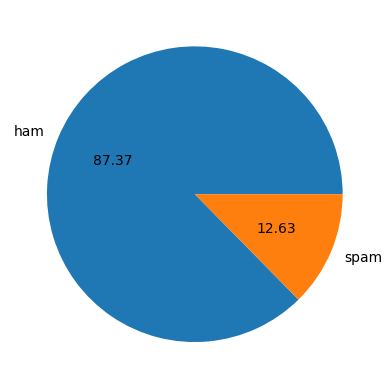

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [22]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==0 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

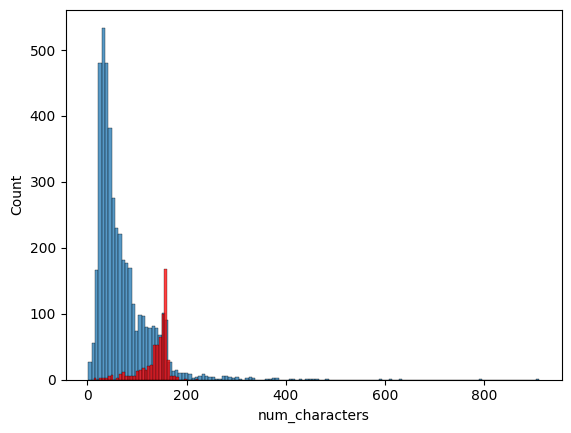

In [36]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

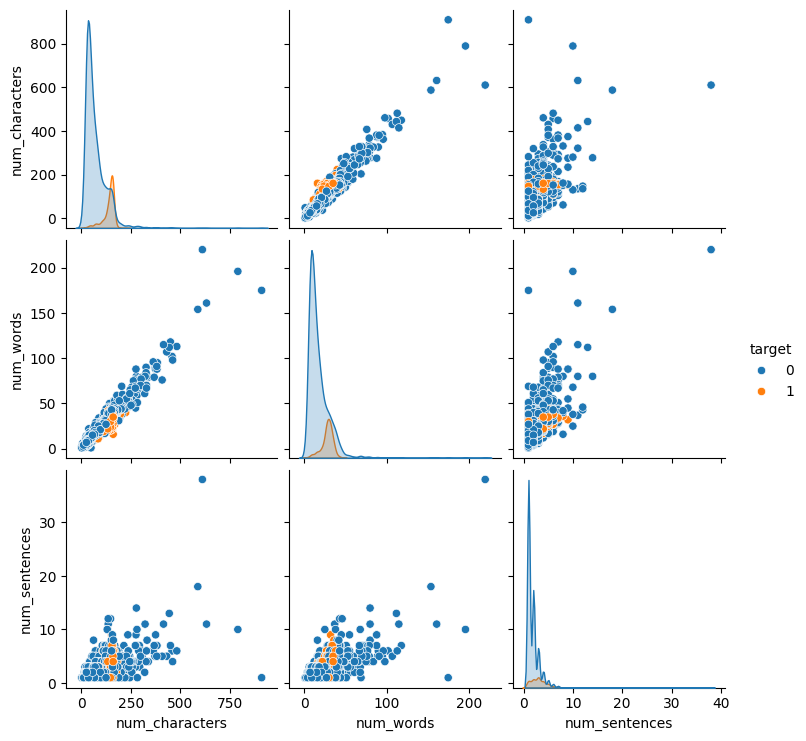

In [37]:
sns.pairplot(df,hue='target')

In [38]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y =[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))


  return " ".join(y);



In [47]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK data if not already downloaded
import nltk
nltk.download('stopwords')

# Create a Porter Stemmer instance
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
transform_text("Hi How Are you nitesh?...")


'hi nitesh'

In [49]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = stopwords.words('english')

# Print the list of stopwords
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
df["text"][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [53]:
df["transformed_text"]=df['text'].apply(transform_text)

In [54]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [55]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc=wc.generate(df[df['target'] == 1]["transformed_text"].str.cat(sep=" "))


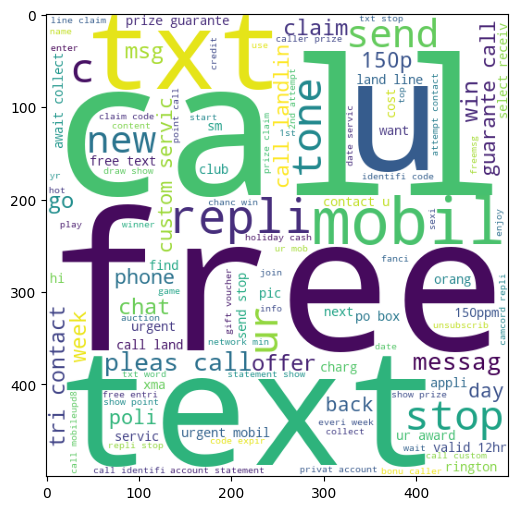

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

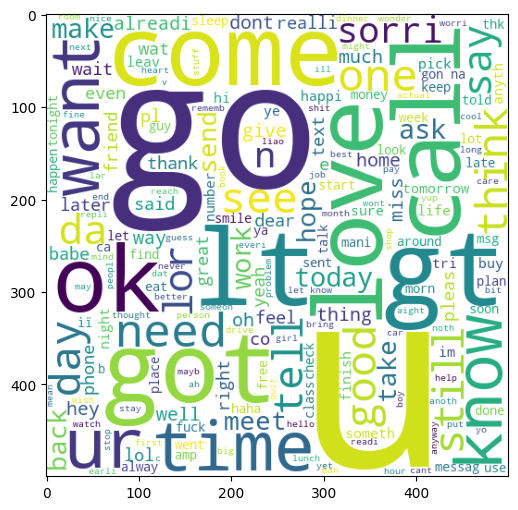

In [57]:
ham_wc=wc.generate(df[df['target'] == 0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
spam_corpus =[]
for msg in df[df['target']==1] ['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [60]:
len(spam_corpus)


9939

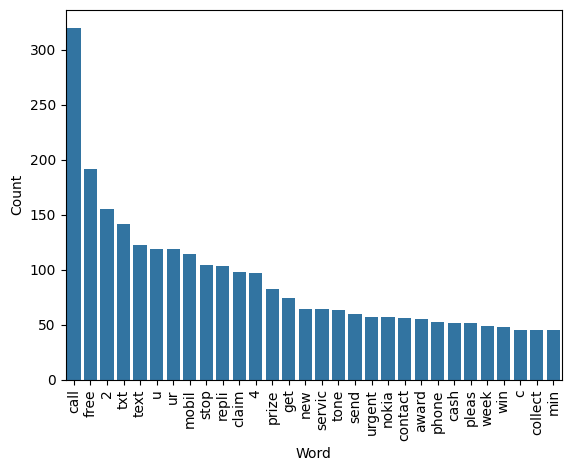

In [61]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Assuming df is your DataFrame with columns 'target' and 'transformed_text'
# Create a spam_corpus
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Create a Counter object for the spam_corpus
word_counts = Counter(spam_corpus)

# Get the 30 most common items from the Counter object
top_30_words = dict(word_counts.most_common(30))

# Convert the dictionary to a DataFrame
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Count', data=df_top_30_words)
plt.xticks(rotation="vertical")
plt.show()


In [62]:
ham_corpus = []
for msg in df[df['target']==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [63]:
len(ham_corpus)

35404

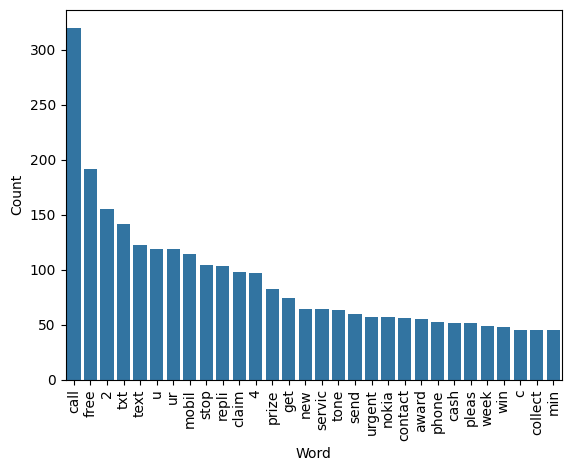

In [64]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Assuming df is your DataFrame with columns 'target' and 'transformed_text'
# Create a spam_corpus
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Create a Counter object for the spam_corpus
word_counts = Counter(spam_corpus)

# Get the 30 most common items from the Counter object
top_30_words = dict(word_counts.most_common(30))

# Convert the dictionary to a DataFrame
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Count', data=df_top_30_words)
plt.xticks(rotation="vertical")
plt.show()


In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [68]:
# from sklearn.preprocessing import MinMaxScaler()
# scaler = MinMaxScaler()
# X=scaler.fit_transform(X)

In [69]:
X.shape

(5169, 3000)

In [70]:
y =df["target"].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split





In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=72)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [77]:
y_pred1

array([0, 0, 0, ..., 0, 1, 1])

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
print(accuracy_score(y_test,y_pred1))

0.8697614442295294


In [80]:
print(confusion_matrix(y_test,y_pred1))

[[1190  167]
 [  35  159]]


In [81]:
print(precision_score(y_test,y_pred1))

0.48773006134969327


In [82]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [83]:
y_pred2=mnb.predict(X_test)

In [84]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9638942617666022
0.9859154929577465
[[1355    2]
 [  54  140]]


In [85]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [86]:
y_pred3 = bnb.predict(X_test)

In [87]:
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9729206963249516
0.9691358024691358
[[1352    5]
 [  37  157]]


In [88]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 799.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.3/101.0 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.6/101.0 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 1.3/101.0 MB 7.4 MB/s eta 0:00:14
    --------------------------------------- 1.8/101.0 MB 9.7 MB/s eta 0:00:11
    --------------------------------------- 1.8/101.0 MB 9.7 MB/s eta 0:00:11
    --------------------------------------- 1.8/101.0 MB 9.7 MB/s eta 0:00:11
    ---

In [89]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [90]:
cat.fit(X_train,y_train)

Learning rate set to 0.01784
0:	learn: 0.6718186	total: 178ms	remaining: 2m 57s
1:	learn: 0.6522642	total: 209ms	remaining: 1m 44s
2:	learn: 0.6355274	total: 235ms	remaining: 1m 18s
3:	learn: 0.6176650	total: 264ms	remaining: 1m 5s
4:	learn: 0.6014465	total: 292ms	remaining: 58.1s
5:	learn: 0.5854097	total: 325ms	remaining: 53.8s
6:	learn: 0.5697821	total: 354ms	remaining: 50.2s
7:	learn: 0.5564574	total: 391ms	remaining: 48.4s
8:	learn: 0.5414734	total: 421ms	remaining: 46.4s
9:	learn: 0.5267384	total: 449ms	remaining: 44.4s
10:	learn: 0.5126785	total: 480ms	remaining: 43.2s
11:	learn: 0.5004205	total: 508ms	remaining: 41.8s
12:	learn: 0.4880207	total: 535ms	remaining: 40.6s
13:	learn: 0.4759676	total: 563ms	remaining: 39.6s
14:	learn: 0.4649860	total: 589ms	remaining: 38.7s
15:	learn: 0.4554722	total: 615ms	remaining: 37.8s
16:	learn: 0.4451592	total: 639ms	remaining: 37s
17:	learn: 0.4355478	total: 665ms	remaining: 36.3s
18:	learn: 0.4261537	total: 690ms	remaining: 35.6s
19:	learn: 

In [91]:
y_pred4 = cat.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

0.965183752417795
0.972972972972973
[[1353    4]
 [  50  144]]


In [92]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = cat, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.017055
0:	learn: 0.6755458	total: 71ms	remaining: 1m 10s
1:	learn: 0.6590189	total: 96.8ms	remaining: 48.3s
2:	learn: 0.6423596	total: 125ms	remaining: 41.5s
3:	learn: 0.6268251	total: 153ms	remaining: 38.2s
4:	learn: 0.6105168	total: 180ms	remaining: 35.8s
5:	learn: 0.5957780	total: 210ms	remaining: 34.8s
6:	learn: 0.5797532	total: 242ms	remaining: 34.4s
7:	learn: 0.5633808	total: 275ms	remaining: 34.1s
8:	learn: 0.5491066	total: 314ms	remaining: 34.5s
9:	learn: 0.5356135	total: 354ms	remaining: 35.1s
10:	learn: 0.5210617	total: 396ms	remaining: 35.6s
11:	learn: 0.5079080	total: 436ms	remaining: 35.9s
12:	learn: 0.4960103	total: 477ms	remaining: 36.2s
13:	learn: 0.4839282	total: 512ms	remaining: 36.1s
14:	learn: 0.4741323	total: 542ms	remaining: 35.6s
15:	learn: 0.4653350	total: 573ms	remaining: 35.3s
16:	learn: 0.4539199	total: 603ms	remaining: 34.8s
17:	learn: 0.4458594	total: 630ms	remaining: 34.4s
18:	learn: 0.4370957	total: 657ms	remaining: 33.9s
19:	learn:

In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

